<a href="https://colab.research.google.com/github/aj225patel/python-fundamentals/blob/main/advanced/asyncio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Asynchronous Programming in Python**

## Concurrency Vs Parallelism in Python

> Concurrency and parallelism are concepts related to the execution of multiple tasks in a program. In Python, these concepts are essential for optimizing performance in programs that need to handle multiple tasks simultaneously. Let's explore each term:



### 1. Concurrency

> **Definition:** Concurrency is a programming concept where multiple tasks make progress together, but not necessarily simultaneously. It doesn't necessarily mean that tasks are executing at the exact same time, but rather they appear to be making progress simultaneously due to interleaved execution.

**Use Cases:** Concurrency is useful when dealing with tasks that may have to wait for external events, such as I/O operations (reading/writing to files or network communication).

**Implementation in Python:**
* **Threading:** Python provides a threading module that allows the creation of threads for concurrent execution. However, due to the Global Interpreter Lock (GIL) in CPython, threading may not provide true parallelism for CPU-bound tasks.
* **Asynchronous I/O:** Python also supports asynchronous programming using the asyncio module. This is particularly effective for I/O-bound tasks that can benefit from non-blocking operations.



### 2. Parallelism:

> **Definition:** Parallelism involves the simultaneous execution of multiple tasks, where each task is broken down into smaller subtasks that can be processed independently.

**Use Cases:** Parallelism is most effective for CPU-bound tasks that can be divided into independent subproblems.

**Implementation in Python:**
* **Multiprocessing:** Python's multiprocessing module allows the creation of separate processes, each with its own interpreter and memory space. This allows true parallelism since each process can run on a separate CPU core. The GIL does not affect multiprocessing.
* **concurrent.futures:** This module provides a high-level interface for asynchronously executing callables. It can use both threading and multiprocessing, depending on the specific executor used.

Here's a simple example to illustrate the difference:


In [ ]:
import concurrent.futures
import time

def task(n):
    print(f"Task {n} started")
    time.sleep(2)
    print(f"Task {n} completed")

# Concurrency using threading
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(task, range(3))

# Parallelism using multiprocessing
with concurrent.futures.ProcessPoolExecutor() as executor:
    executor.map(task, range(3))

Task 0 started
Task 1 started
Task 2 started
Task 0 completed
Task 1 completed
Task 2 completed
Task 0 started
Task 1 started
Task 0 completed
Task 1 completedTask 2 started

Task 2 completed


In this example, the tasks are executed concurrently using threads and in parallel using processes. Note that due to the GIL, threads may not provide true parallelism for CPU-bound tasks, and in such cases, multiprocessing is a more suitable choice.







## Asynchronous vs. synchronous programming

> Ultimately, the choice comes down to operational dependencies. Do you want the start of an operation to depend on another operation’s completion, or do you want it to run independently?

**Asynchronous** is a non-blocking architecture, so the execution of one task isn’t dependent on another. Tasks can run simultaneously.

**Synchronous** is a blocking architecture, so the execution of each operation depends on completing the one before it. Each task requires an answer before moving on to the next iteration.<br><br>

The differences between asynchronous and synchronous include:

* Async is non-blocking, which means it will send multiple requests to a server.
* Sync is blocking — it will only send the server one request at a time and wait for that request to be answered by the server.
* Async increases throughput because multiple operations can run at the same time.
* Sync is slower and more methodical.



## Subroutines and Coroutines

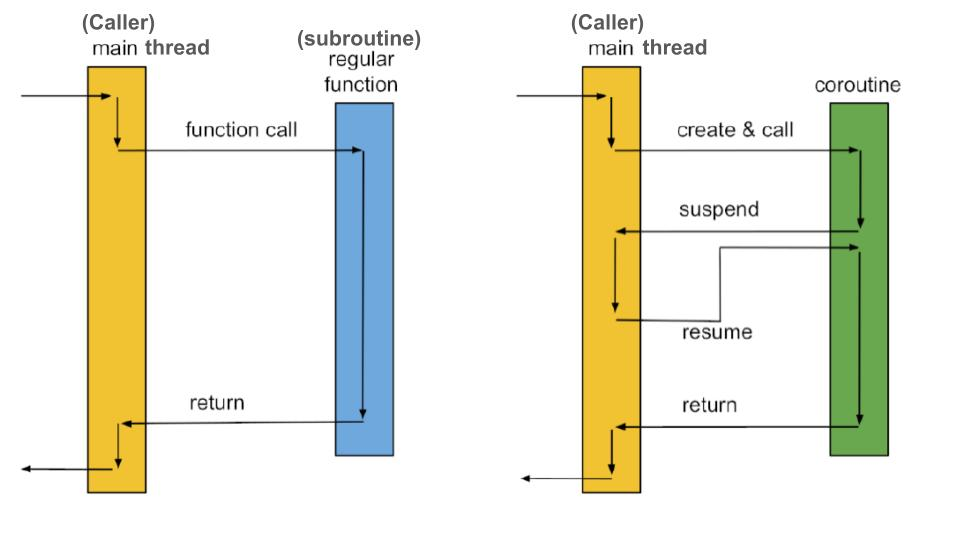

### Subroutines

> Subroutines are blocks of code in Python designed to perform specific tasks. They are categorized into two main types: functions and methods.

* Functions: Functions are independent, reusable blocks of code defined using the def keyword. They can accept arguments and return values. Functions enhance code modularity, readability, and reusability.
* Methods: Methods are functions associated with objects or classes. They operate on the attributes and data within a class and are called using the dot notation on instances.



### Coroutines

> Coroutines are a special type of function in Python used for asynchronous programming. They allow cooperative multitasking and non-blocking I/O operations. Coroutines are defined using the async and await keywords and are managed by an event loop.

* **Async Keyword:** Coroutines are defined with the async keyword, signifying their asynchronous nature.

* **Await Keyword:** The await keyword is used within coroutines to pause execution until an asynchronous operation completes.





## Asynchronous Programming with Asyncio in Python
> Asyncio is a Python library that is used for concurrent programming, including the use of async iterator in Python. It is **not multi-threading or multi-processing**. Asyncio is used as a foundation for multiple Python asynchronous frameworks that provide high-performance network and web servers, database connection libraries, distributed task queues, etc

In the example below, we’ll create a function and make it asynchronous using the **async** keyword. <br><br>
To achieve this, an **async** keyword is used. The program will wait for 1 second after the first print statement is executed and then print the next print statement and so on. Note that we’ll make it sleep (or wait) with the help of **await asyncio.sleep(1)** keyword, not with time.sleep() (Because, time.sleep() is not awaitable method. await method suspends the surrounding coroutine).<br><br>
 To run the program, we’ll have to use the run() function as it is given below. This asynchronous approach is a fundamental concept in Python programming and is particularly useful when working with async iterators in Python.
<br><br>
**Note:** asyncio.run() cannot be called when another asyncio event loop is running in the same thread. In our case, colab is already running an event loop, so the below statement will throw a `RuntimeError: asyncio.run() cannot be called from a running event loop`.

So, we use **await run()** instead of **asyncio.run()**  in colab or jupyter notebook.



In [ ]:

import asyncio

async def fn():
    print('This is ')
    await asyncio.sleep(1)
    print('asynchronous programming')
    await asyncio.sleep(1)
    print('and not multi-threading')

await fn()

This is 
asynchronous programming
and not multi-threading


## Async Event Loop in Python

In the program below, we’re using await fn2() after the first print statement. It simply means to wait until the other function is done executing. So, first, it’s gonna print “one,” then the control shifts to the second function, and “two” and “three” are printed after which the control shifts back to the first function (because fn() has done its work) and then “four” and “five” are printed. This interaction demonstrates the principles of asynchronous programming, which are especially relevant when working with async iterators in Python.

In [ ]:
import asyncio

async def fn():

	print("one")
	await asyncio.sleep(1)
	await fn2()
	print('four')
	await asyncio.sleep(1)
	print('five')
	await asyncio.sleep(1)

async def fn2():
	await asyncio.sleep(1)
	print("two")
	await asyncio.sleep(1)
	print("three")

if __name__ == "__main__":
  await fn()

one
two
three
four
five


Now if you want the program to be actually asynchronous, In the actual order of execution we’ll need to make tasks in order to accomplish this. This means that the other function will begin to run anytime if there is any free time using **asyncio.create_task(fn2())**

## I/O-bound tasks using asyncio.sleep()

In this example, the func1(), func2(), and func3() functions are simulated I/O-bound tasks using asyncio.sleep(). They each “wait” for a different amount of time to simulate varying levels of work.<br><br>
When you run this code, you’ll see that the tasks start concurrently, perform their work asynchronously, and then complete in parallel. The order of completion might vary depending on how the asyncio event loop schedules the tasks. This asynchronous behavior is fundamental to understanding how to manage tasks efficiently, especially when working with async iterators in Python.

In [ ]:
import asyncio


async def func1():
	print("Function 1 started..")
	await asyncio.sleep(2)
	print("Function 1 Ended")


async def func2():
	print("Function 2 started..")
	await asyncio.sleep(3)
	print("Function 2 Ended")


async def func3():
	print("Function 3 started..")
	await asyncio.sleep(1)
	print("Function 3 Ended")


async def main():
	L = await asyncio.gather(
		func1(),
		func2(),
		func3(),
	)
	print("Main Ended..")


if __name__ == "__main__":
  await main()

Function 1 started..
Function 2 started..
Function 3 started..
Function 3 Ended
Function 1 Ended
Function 2 Ended
Main Ended..


## Difference Between Asynchronous and Multi-Threading Programming

* Asynchronous programming allows only one part of a program to run at a specific time.
* Consider three functions in a Python program: fn1(), fn2(), and fn3().
* In asynchronous programming, if fn1() is not actively executing (e.g., it’s asleep, waiting, or has completed its task), it won’t block the entire program.
* Instead, the program optimizes CPU time by allowing other functions (e.g., fn2()) to execute while fn1() is inactive.
* Only when fn2() finishes or sleeps, the third function, fn3(), starts executing.
* This concept of asynchronous programming ensures that one task is performed at a time, and other tasks can proceed independently.
* In contrast, in multi-threading or multi-processing, all three functions run concurrently without waiting for each other to finish.
* With asynchronous programming, specific functions are designated as asynchronous using the async keyword, and the asyncio Python library helps manage this asynchronous behavior.

## With Vs Without Asyncio

In [ ]:
import time

def brewCofee():
  print('Start brewCofee()')
  time.sleep(3)
  print('End brewCofee()')
  return 'Coffe ready'

def toastBagel():
  print('Start toastBagel()')
  time.sleep(2)
  print('End toastBagel()')
  return 'Bagel toasted'

def main():
  start_time = time.time()

  result_cofee = brewCofee()
  result_Bagel = toastBagel()

  end_time = time.time()
  elapsed_time = end_time - start_time

  print(f'result of brewCofee(): {result_cofee}')
  print(f'result of toastBagel(): {result_Bagel}')
  print(f'total execution time: {elapsed_time: .2f} seconds')

if __name__ == "__main__":
  main()

Start brewCofee()
End brewCofee()
Start toastBagel()
End toastBagel()
result of brewCofee(): Coffe ready
result of toastBagel(): Bagel toasted
total execution time:  5.01 seconds


In [ ]:
import time
import asyncio

async def brewCofee():
  print('Start brewCofee()')
  await asyncio.sleep(3)
  print('End brewCofee()')
  return 'Coffe ready'

async def toastBagel():
  print('Start toastBagel()')
  await asyncio.sleep(2)
  print('End toastBagel()')
  return 'Bagel toasted'

async def main():
  start_time = time.time()

  batch = asyncio.gather(brewCofee(), toastBagel())
  # here brewCofee() and toastBagel() are not typical function call
  # But, they are coroutine objects
  # which gives ayncio the ability to start and stop coroutines

  result_cofee, result_Bagel = await batch

  end_time = time.time()
  elapsed_time = end_time - start_time

  print(f'result of brewCofee(): {result_cofee}')
  print(f'result of toastBagel(): {result_Bagel}')
  print(f'total execution time: {elapsed_time: .2f} seconds')

if __name__ == "__main__":
  # asyncio.run(main())
  await main()

Start brewCofee()
Start toastBagel()
End toastBagel()
End brewCofee()
result of brewCofee(): Coffe ready
result of toastBagel(): Bagel toasted
total execution time:  3.00 seconds


### Alternate Approach by creating tasks

In [ ]:
import time
import asyncio

async def brewCofee():
  print('Start brewCofee()')
  await asyncio.sleep(3)
  print('End brewCofee()')
  return 'Coffe ready'

async def toastBagel():
  print('Start toastBagel()')
  await asyncio.sleep(2)
  print('End toastBagel()')
  return 'Bagel toasted'

async def main():
  start_time = time.time()

  cofee_task = asyncio.create_task(brewCofee())
  Bagel_task = asyncio.create_task(toastBagel())

  result_cofee, result_Bagel = await cofee_task, await Bagel_task

  end_time = time.time()
  elapsed_time = end_time - start_time

  print(f'result of brewCofee(): {result_cofee}')
  print(f'result of toastBagel(): {result_Bagel}')
  print(f'total execution time: {elapsed_time: .2f} seconds')

if __name__ == "__main__":
  # asyncio.run(main())
  await main()

Start brewCofee()
Start toastBagel()
End toastBagel()
End brewCofee()
result of brewCofee(): Coffe ready
result of toastBagel(): Bagel toasted
total execution time:  3.00 seconds


## Realworld Application of asyncio

**Problem Statement:** Download multiple images concurrently using asyncio

In [ ]:
import time
import asyncio
import requests

In [ ]:
async def function1():
  print("func 1")
  URL = "https://wallpaperaccess.in/public/uploads/preview/1920x1200-desktop-background-ultra-hd-wallpaper-wiki-desktop-wallpaper-4k-.jpg"
  response = requests.get(URL)
  open("wallpaper1.jpg", "wb").write(response.content)

  return "Harry"

async def function2():
  print("func 2")
  URL = "https://p4.wallpaperbetter.com/wallpaper/490/433/199/nature-2560x1440-tree-snow-wallpaper-preview.jpg"
  response = requests.get(URL)
  open("wallpaper2.jpg", "wb").write(response.content)

async def function3():
  print("func 3")
  URL = "https://wallpapercave.com/dwp2x/wp5718716.jpg"
  response = requests.get(URL)
  open("wallpaper3.jpg", "wb").write(response.content)

async def main():
  await function1()
  await function2()
  await function3()
  return 3

if __name__ == "__main__":
  # This function cannot be called when another asyncio event loop is running in the same thread.
  # In our case, colab is already running an event loop, so the below statement will throw below error:
  # RuntimeError: asyncio.run() cannot be called from a running event loop
  # asyncio.run(main())
  await main()

func 1
func 2
func 3


In [ ]:
async def function1():
  print("func 1")
  URL = "https://wallpaperaccess.in/public/uploads/preview/1920x1200-desktop-background-ultra-hd-wallpaper-wiki-desktop-wallpaper-4k-.jpg"
  response = requests.get(URL)
  open("wallpaper1.jpg", "wb").write(response.content)

  return "Harry"

async def function2():
  print("func 2")
  URL = "https://p4.wallpaperbetter.com/wallpaper/490/433/199/nature-2560x1440-tree-snow-wallpaper-preview.jpg"
  response = requests.get(URL)
  open("wallpaper2.jpg", "wb").write(response.content)

async def function3():
  print("func 3")
  URL = "https://wallpapercave.com/dwp2x/wp5718716.jpg"
  response = requests.get(URL)
  open("wallpaper3.jpg", "wb").write(response.content)

async def main():
  # await function1()
  # await function2()
  # await function3()
  # return 3
  # L = await asyncio.gather(
  #       function1(),
  #       function2(),
  #       function3(),
  #   )
  # print(L)
  task = asyncio.create_task(function1())
  # await function1()
  await function2()
  await function3()

if __name__ == "__main__":
  # This function cannot be called when another asyncio event loop is running in the same thread.
  # In our case, colab is already running an event loop, so the below statement will throw below error:
  # RuntimeError: asyncio.run() cannot be called from a running event loop
  # asyncio.run(main())
  await main()

func 2
func 3
func 1


In [ ]:
async def function1():
  print("func 1")
  URL = "https://wallpaperaccess.in/public/uploads/preview/1920x1200-desktop-background-ultra-hd-wallpaper-wiki-desktop-wallpaper-4k-.jpg"
  response = requests.get(URL)
  open("wallpaper1.jpg", "wb").write(response.content)

  return "Harry"

async def function2():
  print("func 2")
  URL = "https://p4.wallpaperbetter.com/wallpaper/490/433/199/nature-2560x1440-tree-snow-wallpaper-preview.jpg"
  response = requests.get(URL)
  open("wallpaper2.jpg", "wb").write(response.content)

async def function3():
  print("func 3")
  URL = "https://wallpapercave.com/dwp2x/wp5718716.jpg"
  response = requests.get(URL)
  open("wallpaper3.jpg", "wb").write(response.content)

async def main():
  # await function1()
  # await function2()
  # await function3()
  # return 3
  L = await asyncio.gather(
        function1(),
        function2(),
        function3(),
    )
  print(L)
  # task = asyncio.create_task(function1())
  # # await function1()
  # await function2()
  # await function3()

if __name__ == "__main__":
  # This function cannot be called when another asyncio event loop is running in the same thread.
  # In our case, colab is already running an event loop, so the below statement will throw below error:
  # RuntimeError: asyncio.run() cannot be called from a running event loop
  # asyncio.run(main())
  await main()

func 1
func 2
func 3
['Harry', None, None]
